In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import math

# Load the image and convert to Grayscale (L) for clearer understanding of intensity transformations
original_img = Image.open("beans.tif").convert('L')

def show_comparison(img_original, img_transformed, lut, title_transformed):
    plt.figure(figsize=(15, 5))
    
    # Lut
    plt.subplot(1, 3, 1)
    plt.plot(lut)
    plt.title("Transformation Graph")
    #plt.axis('off')

    # Original
    plt.subplot(1, 3, 2)
    plt.imshow(img_original, cmap='gray', vmin=0, vmax=255)
    plt.title("Original Image")
    plt.axis('off')
    
    # Transformed
    plt.subplot(1, 3, 3)
    plt.imshow(img_transformed, cmap='gray', vmin=0, vmax=255)
    plt.title(title_transformed)
    plt.axis('off')
    
    plt.show()

print("Image loaded.")

Image loaded.


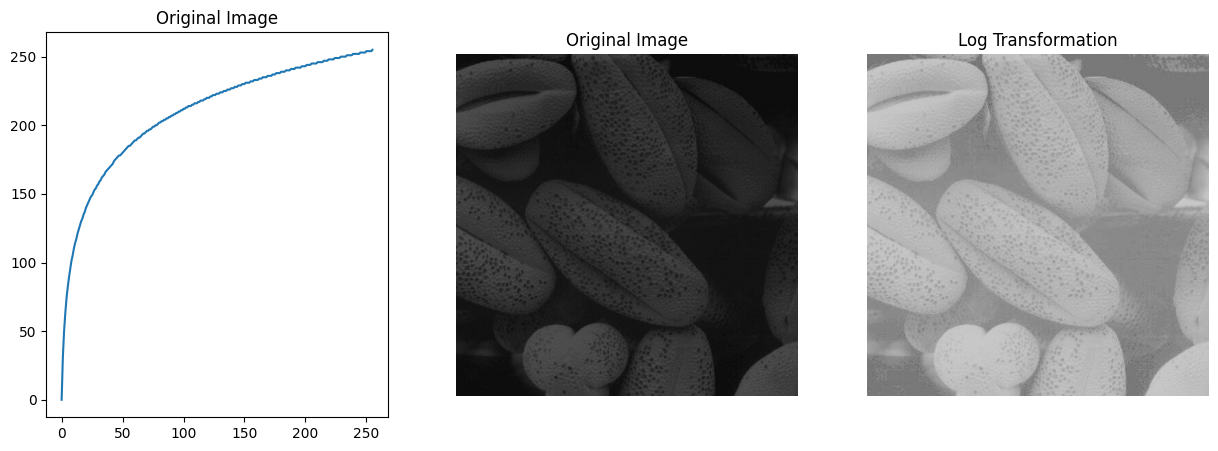

In [2]:
# --- LOG TRANSFORMATION ---

# 1. Create the Look Up Table (LUT)
# We calculate s = c * log(1 + r) for every r from 0 to 255
# c is a scaling factor to ensure the result fits in 0-255. 
# c = 255 / log(1 + max_input_value)
c = 255 / math.log(1 + 255)

log_lut = []
for r in range(256):
    s = c * math.log(1 + r)
    log_lut.append(int(s))

# 2. Apply the LUT using Pillow's point() method
log_transformed_img = original_img.point(log_lut)

# 3. Visualize
show_comparison(original_img, log_transformed_img, log_lut, "Log Transformation")

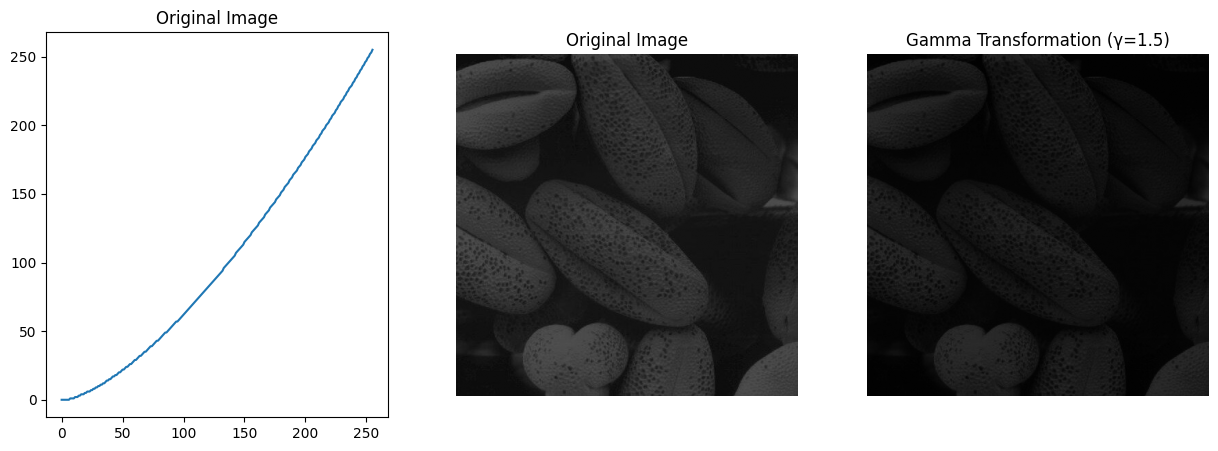

In [3]:
# --- POWER LAW (GAMMA) TRANSFORMATION ---

# --- PARAMETERS TO PLAY WITH ---
gamma = 1.5   # Try 0.4, 0.6 (Brightening) 
              # Try 1.5, 2.5 (Darkening)
# -------------------------------

# 1. Create the LUT
# Formula: s = 255 * (r / 255) ^ gamma
gamma_lut = []
for r in range(256):
    # Normalize r to 0-1, apply gamma, then scale back to 0-255
    s = 255 * ((r / 255.0) ** gamma)
    gamma_lut.append(int(s))

# 2. Apply the LUT
gamma_transformed_img = original_img.point(gamma_lut)

# 3. Visualize
show_comparison(original_img, gamma_transformed_img, gamma_lut, f"Gamma Transformation (γ={gamma})")

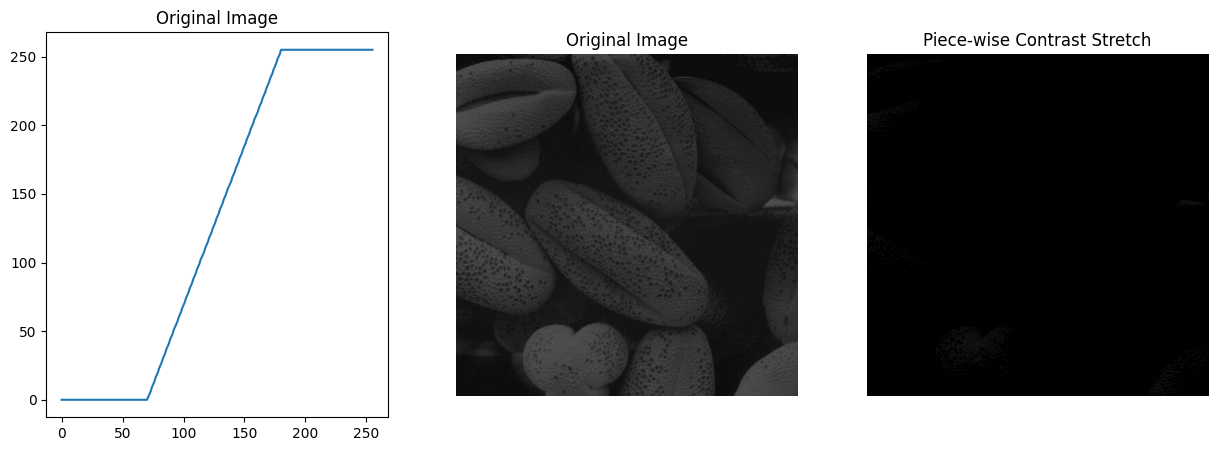

In [4]:
# --- PIECE-WISE LINEAR TRANSFORM (CONTRAST STRETCHING) ---

# --- PARAMETERS TO PLAY WITH ---
r1, s1 = 70, 0    # Input intensities < 70 become 0
r2, s2 = 180, 255 # Input intensities > 180 become 255
# Try narrowing the gap between r1 and r2 (e.g., 100 and 150) for extreme contrast (Thresholding)
# -------------------------------

# 1. Create the LUT
piecewise_lut = []
for r in range(256):
    if r < r1:
        # First segment (usually dark/suppressed)
        # Simple slope calculation from (0,0) to (r1, s1)
        s = (s1 / r1) * r
    elif r1 <= r <= r2:
        # Middle segment (The stretching part)
        # Slope from (r1, s1) to (r2, s2)
        s = ((s2 - s1) / (r2 - r1)) * (r - r1) + s1
    else:
        # Last segment (usually saturated/bright)
        # Slope from (r2, s2) to (255, 255)
        s = ((255 - s2) / (255 - r2)) * (r - r2) + s2
    
    piecewise_lut.append(int(s))

# 2. Apply the LUT
contrast_stretched_img = original_img.point(piecewise_lut)

# 3. Visualize
show_comparison(original_img, contrast_stretched_img, piecewise_lut, "Piece-wise Contrast Stretch")

[0, 0, 0, 1, 1, 0, 4, 13, 37, 93, 279, 786, 2000, 11646, 2252, 2144, 3097, 6159, 5776, 13263, 8624, 5155, 4337, 3484, 3029, 3047, 3104, 3178, 3234, 3384, 3287, 3396, 3416, 3767, 3987, 4267, 4507, 4665, 4722, 4651, 4509, 4595, 4629, 4548, 4633, 4922, 5275, 5421, 5129, 4886, 4591, 4336, 4263, 4142, 4198, 3813, 3869, 3727, 3385, 3073, 2827, 2645, 2297, 2150, 2149, 2163, 2026, 1916, 1761, 1598, 1537, 1557, 1544, 1454, 1445, 1334, 1117, 831, 485, 234, 105, 53, 20, 7, 3, 4, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


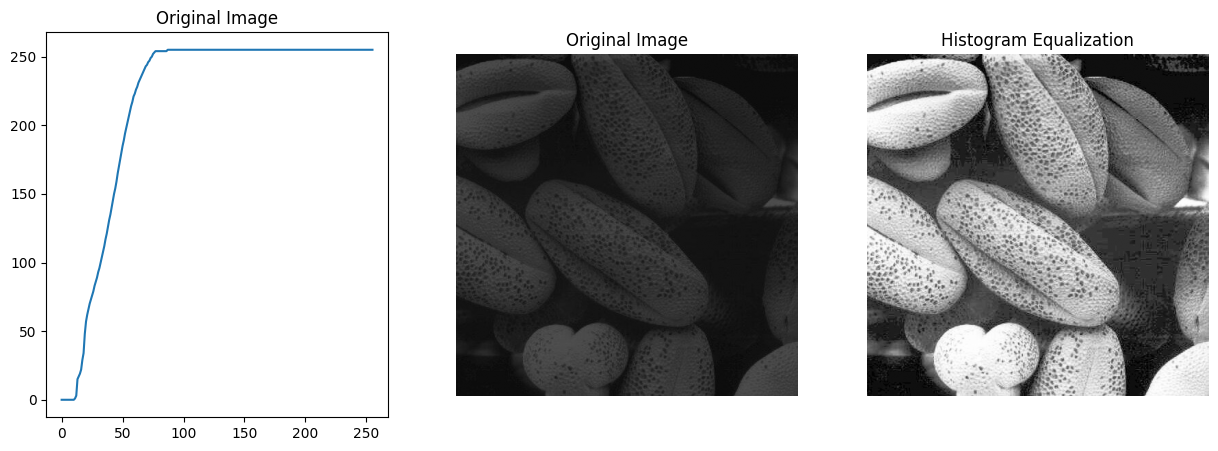

C:\Users\New User\AppData\Local\Temp\ipykernel_14040\2432950388.py:35: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.subplot(1, 2, 1); plt.hist(np.array(original_img).flatten(), 256, [0,256], color='r'); plt.title("Original Histogram")
C:\Users\New User\AppData\Local\Temp\ipykernel_14040\2432950388.py:36: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.subplot(1, 2, 2); plt.hist(np.array(equalized_img).flatten(), 256, [0,256], color='b'); plt.title("Equalized Histogram")


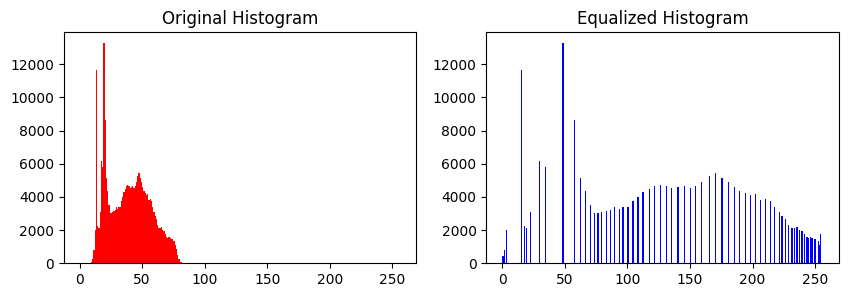

In [ ]:
# --- PIECE-WISE LINEAR TRANSFORM (CONTRAST STRETCHING) ---

# --- PARAMETERS TO PLAY WITH ---
# No parameters! This algorithm adapts to the image content automatically.
# -------------------------------

# 1. Get the histogram of the original image
# Returns a list of 256 integers (pixel counts for values 0-255)
histogram = original_img.histogram()
total_pixels = sum(histogram)

# 2. Calculate the Cumulative Distribution Function (CDF) and create LUT
# We perform a cumulative sum and normalize it immediately to 0-255
equalization_lut = []
cumulative_sum = 0

for count in histogram:
    cumulative_sum += count
    # Formula: s = (CDF(r) - CDF_min) / (Total - CDF_min) * 255
    # Simplified here: s = CDF(r) / Total * 255
    s = (cumulative_sum / total_pixels) * 255
    equalization_lut.append(int(s))

print(histogram)

# 3. Apply the LUT
equalized_img = original_img.point(equalization_lut)

# 4. Visualize
show_comparison(original_img, equalized_img, equalization_lut, "Histogram Equalization")

# Optional: Plot the histograms to see the change
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1); plt.hist(np.array(original_img).flatten(), 256, [0,256], color='r'); plt.title("Original Histogram")
plt.subplot(1, 2, 2); plt.hist(np.array(equalized_img).flatten(), 256, [0,256], color='b'); plt.title("Equalized Histogram")
plt.show()

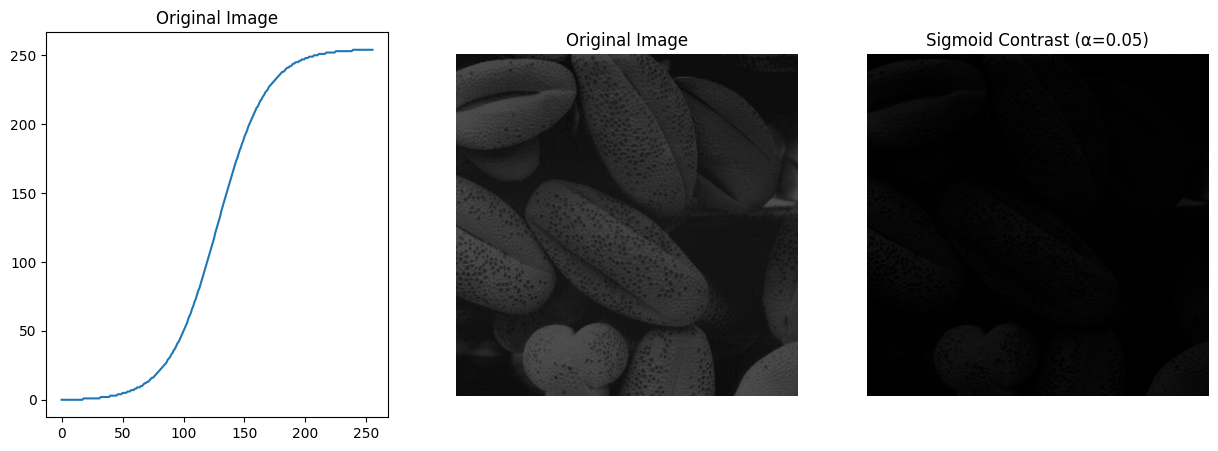

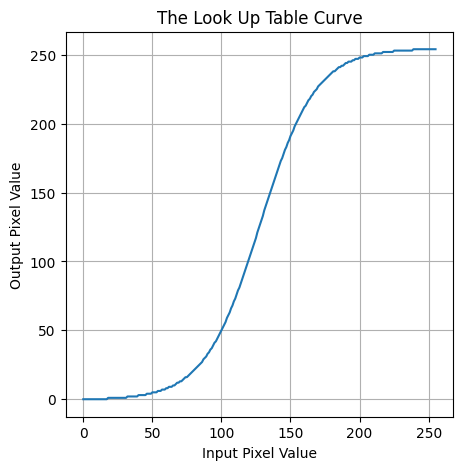

In [10]:
# --- CHALLENGE: Sigmoid "S-Curve" Contrast ---

# --- PARAMETERS TO PLAY WITH ---
alpha = 0.05  # Slope steepness. Try 0.03 (soft) to 0.1 (hard contrast)
# -------------------------------

# 1. Create the LUT
sigmoid_lut = []
for r in range(256):
    # Step A: Center the input around 0 (shifting 128 to 0)
    val = r - 128
    
    # Step B: Apply Sigmoid formula: 1 / (1 + exp(-alpha * val))
    # We use a try/except or math.exp checks to avoid overflow, 
    # though with 0-255 and alpha ~0.1 it is safe.
    try:
        sigmoid_result = 1 / (1 + math.exp(-alpha * val))
    except OverflowError:
        sigmoid_result = 0 if alpha * val < 0 else 1
        
    # Step C: Scale the 0-1 result back to 0-255
    s = sigmoid_result * 255
    
    sigmoid_lut.append(int(s))

# 2. Apply the LUT
sigmoid_img = original_img.point(sigmoid_lut)

# 3. Visualize
show_comparison(original_img, sigmoid_img, sigmoid_lut, f"Sigmoid Contrast (α={alpha})")

# Optional: Plot the Curve to prove it is an "S"
plt.figure(figsize=(5, 5))
plt.plot(sigmoid_lut)
plt.title("The Look Up Table Curve")
plt.xlabel("Input Pixel Value")
plt.ylabel("Output Pixel Value")
plt.grid(True)
plt.show()